In [11]:
import tensorflow as tf
import keras as K
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("TensorFlow Version:",tf.__version__)
print("Keras Version:",K.__version__)

TensorFlow Version: 2.8.0
Keras Version: 2.8.0


As bibliotecas utilizadas são semelhantes a implementação do perceptron, com exceção da Keras que facilitou a implementação da rede neural não precisando utilizar o TensorFlow.

Todo o processamento de dados é semelhante ao caso da implementação da rede singlePerceptron.

In [12]:
vehicle_types = os.listdir('Dataset/imgs//')
path = 'Dataset/imgs//'

sizeExpected = 16

images = []
labels = []
cost_history = []

for i in vehicle_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) if i.endswith('.jpg')]
    print(filenames)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(sizeExpected, sizeExpected))
        images.append(img)
        labels.append(i)

images = np.array(images)
images = images.astype('float32')/255
images.shape

x = images
y = labels
print(y)
y_labelEncoder = LabelEncoder()
y = y_labelEncoder.fit_transform(y)
print(y)
x,Y = shuffle(x,y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.375, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

['airplane1.jpg', 'airplane10.jpg', 'airplane11.jpg', 'airplane13.jpg', 'airplane14.jpg', 'airplane15.jpg', 'airplane16.jpg', 'airplane17.jpg', 'airplane19.jpg', 'airplane2.jpg', 'airplane20.jpg', 'airplane21.jpg', 'airplane22.jpg', 'airplane23.jpg', 'airplane25.jpg', 'airplane26.jpg', 'airplane27.jpg', 'airplane28.jpg', 'airplane29.jpg', 'airplane3.jpg', 'airplane31.jpg', 'airplane32.jpg', 'airplane33.jpg', 'airplane34.jpg', 'airplane35.jpg', 'airplane37.jpg', 'airplane38.jpg', 'airplane39.jpg', 'airplane4.jpg', 'airplane40.jpg', 'airplane41.jpg', 'airplane45.jpg', 'airplane46.jpg', 'airplane47.jpg', 'airplane49.jpg', 'airplane5.jpg', 'airplane50.jpg', 'airplane7.jpg', 'airplane8.jpg', 'airplane9.jpg']
['299281.jpg', '299795.jpg', '299796.jpg', '299803.jpg', '299806.jpg', '317425.jpg', '337456.jpg', '382937.jpg', '389050.jpg', '427198.jpg', '554491.jpg', '560394.jpg', '563043.jpg', '565155.jpg', '567270.jpg', '567497.jpg', '567503.jpg', '573909.jpg', '580622.jpg', '584420.jpg', '58871

Com os dados tratados, podemos então iniciar a implementação da rede neural convulacional.

In [13]:
classifier = Sequential()

Aqui criamos a arquitetura da nossa rede, adicionando:
- Duas camadas de convulação, e a cada uma delas, uma camda de pooling. 
- Aplicamos uma camada de de achatamento para converter a saida de duas dimensões da camada anterior em uma dimensão. Até então temos a camada de entrada.
- Adicionamos uma camada escondida de 128 unidades, com função de ativação relu.
- E então, uma camada de saida, com as duas classes como unidades.

In [14]:
classifier.add(Conv2D(32, (3, 3), input_shape = (16, 16, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = tf.nn.relu))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = tf.nn.relu))
classifier.add(Dense(units = 64, activation = tf.nn.relu))
classifier.add(Dense(units = 2, activation = tf.nn.softmax))

Então, compilamos a nossa rede, utilizando o otimizador ADAM.

In [15]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Definimos uma função de callback executada no final de cada epoca para guardar o valor do erro calculado em uma lista a fim de posteriormente plota-lo em um grafico e compara-lo com as outras implementações.

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        cost_history.append(logs.get('loss'))

Iniciamos então o treinamento da nossa rede, considerando o mesmo valor de epocas que foi usado na rede single perceptron e utilizando como callback a função que definimos acima:

In [17]:
callbacks = myCallback()
classifier.fit(train_x,train_y,epochs=100, callbacks=[callbacks])

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.4600
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6740 - accuracy: 0.5800
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6641 - accuracy: 0.5800
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6530 - accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6541 - accuracy: 0.7200
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6400 - accuracy: 0.7000
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6248 - accuracy: 0.6400
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6097 - accuracy: 0.6800
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6030 - accuracy: 0.8000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.5852 - accuracy: 0.8000
Epoch 11/100
2/2 [===========

Com isso, podemos ver que alcançamos um custo final de aproximadamente 0.39. Um gráfico mostrando o comportamento do valor do custo ao longo das epocas pode ser visto abaixo:


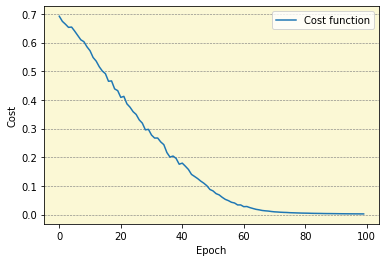

In [18]:
fig, ax = plt.subplots()
ax.plot(cost_history, label='Cost function')
ax.legend()
ax.grid(color='grey', linestyle='--', linewidth=0.6, axis='y')
ax.set_facecolor('#FBF8D5')
ax.set_ylabel('Cost')
ax.set_xlabel('Epoch')
plt.show()

Depois do treinamento, podemos então fazer uma tentativa de previsão. Primeiro realizo o tratamento da imagem necessário para usar a função de previsão fornecida pelo keras:

In [19]:
image = cv2.imread('test2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image,(sizeExpected, sizeExpected))
image = np.array(image)

print(img.shape)
image = image.reshape((1, image.shape[0], image.shape[1]))

(16, 16)


Então realizamos a previsão:

In [20]:
result = classifier.predict(image)
print(result)

if(result[0][0] > result[0][1]):
    print("Avião")
else:
    print("Barco")


[[0. 1.]]
Barco
